**Connect with google drive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Library**

In [40]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

**Read Data**

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Elena/tweets.csv", encoding='ISO-8859–1', header =None)
dataset.head()

,0,1,2
0,jeffmeier87,1452824609,@Flunkie we have @etdragonpunch . even more d...
1,IanofPortland,1452824609,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,HRHHiramSNL,1452824609,RT @President: Obama's Failings Among the Reas...
3,elizabe77648141,1452824609,Rand Paul Supposes He Might Support Trump As N...
4,jmdonsi,1452824609,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...


**Column name**

In [4]:
dataset.columns = ["Sender", "Timestamp", "tweets"]
dataset.head()

,Sender,Timestamp,tweets
0,jeffmeier87,1452824609,@Flunkie we have @etdragonpunch . even more d...
1,IanofPortland,1452824609,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,HRHHiramSNL,1452824609,RT @President: Obama's Failings Among the Reas...
3,elizabe77648141,1452824609,Rand Paul Supposes He Might Support Trump As N...
4,jmdonsi,1452824609,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...


**Sort the dataset according to Timestamp**

In [5]:
dataset.sort_values("Timestamp", axis = 0, ascending = True, inplace = True)
dataset.head()

,Sender,Timestamp,tweets
0,jeffmeier87,1452824609,@Flunkie we have @etdragonpunch . even more d...
1,IanofPortland,1452824609,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,HRHHiramSNL,1452824609,RT @President: Obama's Failings Among the Reas...
3,elizabe77648141,1452824609,Rand Paul Supposes He Might Support Trump As N...
4,jmdonsi,1452824609,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...


**Save the dataset given a new name**

In [6]:
sort_dataset = dataset["tweets"]
sort_dataset.to_csv("/content/drive/MyDrive/Elena/ElenaB" + '.csv', index = False)

In [7]:
data = pd.DataFrame(dataset)
data.head()

,Sender,Timestamp,tweets
0,jeffmeier87,1452824609,@Flunkie we have @etdragonpunch . even more d...
1,IanofPortland,1452824609,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,HRHHiramSNL,1452824609,RT @President: Obama's Failings Among the Reas...
3,elizabe77648141,1452824609,Rand Paul Supposes He Might Support Trump As N...
4,jmdonsi,1452824609,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...


**5 most Active Senders**

In [8]:
Active_sender = data['Sender'].value_counts()
Active_sender

klansmen4trump     90
facists4trump      55
dawngpsalm63       26
jessnatenuff       24
skyjones55         24
                   ..
jasminmalik_        1
Vinzinho91          1
thegardengnomez     1
triciasp_           1
Aussinnsamppson     1
Name: Sender, Length: 15822, dtype: int64

In [34]:
active_sender = pd.DataFrame(Active_sender)
print(active_sender[0:5]) # 5 Most Active sender

                Sender
klansmen4trump      90
facists4trump       55
dawngpsalm63        26
jessnatenuff        24
skyjones55          24


**10 most Re-Tweeted tweets**

In [10]:
dataset.head()

,Sender,Timestamp,tweets
0,jeffmeier87,1452824609,@Flunkie we have @etdragonpunch . even more d...
1,IanofPortland,1452824609,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,HRHHiramSNL,1452824609,RT @President: Obama's Failings Among the Reas...
3,elizabe77648141,1452824609,Rand Paul Supposes He Might Support Trump As N...
4,jmdonsi,1452824609,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...


In [11]:
tweets = dataset["tweets"]
tweets[0]

'@Flunkie we have @etdragonpunch .  even more dank than trump'

In [12]:
re_tweets = []
for i in range(len(tweets)):
  if tweets[i].startswith("RT"):
    re_tweets.append(tweets[i])


In [13]:
re_tweets = pd.DataFrame({'Re-tweets': re_tweets})
print(re_tweets)

                                               Re-tweets
0      RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
1      RT @President: Obama's Failings Among the Reas...
2      RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...
3      RT @realDonaldTrump: "@ameriflames: @realDonal...
4      RT @twaimz: 2016.   2 stick horses (one unicor...
...                                                  ...
12553  RT @corybe: This little detail from the new NB...
12554  RT @AnnCoulter: J@s@sF-ingChr@st - even GOP re...
12555  RT @businessinsider: 'BITTER BROMANCE BREAKUP'...
12556  RT @zzzeeshaan: Alan Rickman died when he was ...
12557       RT @officiaInatalie: idk not trump tho #2016

[12558 rows x 1 columns]


In [14]:
re_tweets = re_tweets["Re-tweets"].value_counts()

RT @zzzeeshaan: Alan Rickman died when he was 69, David Bowie died when he was 69, Donald Trump is currently 69, @ God https://t.co/5oCNCyCÛ_    1642
RT @twaimz: 2016.   2 stick horses (one unicorn) 0 dates (people not the fruit) 1 bitch (me) 6 something. i don't know 666 the devil donaldÛ_     820
RT @deray: Donald Trump. 2016. https://t.co/xgteBpQ5KO                                                                                             548
RT @revivaIariana: David Bowie died at 69. Alan Rickman died at 69. Donald Trump is 69. https://t.co/SDdW4PtGSE                                    415
RT @NathanZed: I cut together Donald Trump's rally and the scene from The Interview when the little girl sings bout Kim Jong Un https://t.cÛ_     379
                                                                                                                                                  ... 
RT @shondi99: How a New York Times bombshell and Donald Trump could finish Cruz https://t.co/p

In [35]:
re_tweets = pd.DataFrame(re_tweets)
print(re_tweets[0:10]) # 10 most Re-Tweets

                                                    Re-tweets
RT @zzzeeshaan: Alan Rickman died when he was 6...       1642
RT @twaimz: 2016.   2 stick horses (one unicorn...        820
RT @deray: Donald Trump. 2016. https://t.co/xgt...        548
RT @revivaIariana: David Bowie died at 69. Alan...        415
RT @NathanZed: I cut together Donald Trump's ra...        379
RT @leezachariah: Very sad to report that Donal...        357
RT @TheTweetOfGod: SPOT THE MISSING NUMBER  Dav...        182
RT @mylastdilemma: David Bowie: 69 ans Alan Ric...        139
RT @AnneAnneAss: Michel Delpech : 69 ans. David...        135
RT @sahilkapur: Staggering statistic in the NBC...        120


**5 most cited screen-names**

In [16]:
dataset["tweets"].head()

0    @Flunkie we have @etdragonpunch .  even more d...
1    RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2    RT @President: Obama's Failings Among the Reas...
3    Rand Paul Supposes He Might Support Trump As N...
4    RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...
Name: tweets, dtype: object

In [17]:
import re
pattern = r'@(\w+)'
#s = re.findall(pattern, tweets[0])

In [18]:
cs_data = []
for i in range(len(tweets)):
  #if tweets[i].startswith("#") and tweets[i].endswith("#"):
  cs_data.append(re.findall(pattern, dataset["tweets"][i]))

In [19]:
from collections import Iterable
def flatten(lis):
  for item in lis:
    if isinstance(item, Iterable) and not isinstance(item, str):
      for x in flatten(item):
        yield x
    else:        
      yield item
cs_data = list(flatten(cs_data))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  """Entry point for launching an IPython kernel.


In [20]:
cs_data = pd.DataFrame(cs_data)
cs_data

,0
0,Flunkie
1,etdragonpunch
2,TIMENOUT
3,President
4,trendsinusa8
...,...
20252,sF
20253,st
20254,businessinsider
20255,zzzeeshaan


In [21]:
cs_name = cs_data.value_counts()
cs_name

zzzeeshaan         1647
realDonaldTrump    1171
twaimz              855
deray               682
revivaIariana       415
                   ... 
Rockinmimi10          1
RomeosMom7            1
RommelJGuzman         1
RoneJae               1
TheMalzbergShow       1
Length: 4074, dtype: int64

In [36]:
print(cs_name[0:5]) # 5 most screen name

zzzeeshaan         1647
realDonaldTrump    1171
twaimz              855
deray               682
revivaIariana       415
dtype: int64


**10 most popular hashtags words**

In [23]:
pattern = r'#(\w+)'
h_data = []
for i in range(len(tweets)):
  h_data.append(re.findall(pattern, dataset["tweets"][i]))

In [24]:
h_data = list(flatten(h_data))

In [25]:
h_name = pd.DataFrame({"hashtag-name": h_data})
h_name

,hashtag-name
0,MakeAmericaGreatAgain
1,Trump2016
2,MakeAmericaGreatAgain
3,KaddieAbdul
4,other
...,...
5440,NewHampshire
5441,American
5442,Trump
5443,TrumpTrain


In [26]:
h_name = h_name["hashtag-name"].value_counts()
h_name

Trump                    487
Trump2016                364
GOPDebate                186
MakeAmericaGreatAgain    164
RealDonaldTrump          146
                        ... 
SaveTheLions               1
horny                      1
gucci                      1
billyissexy                1
anotherone                 1
Name: hashtag-name, Length: 1245, dtype: int64

In [37]:
print(h_name[0:10])  # 10 most popular hashtags words

Trump                    487
Trump2016                364
GOPDebate                186
MakeAmericaGreatAgain    164
RealDonaldTrump          146
TRUMP                    144
tcot                      98
trump                     92
DonaldTrump               60
TrumpTrain                58
Name: hashtag-name, dtype: int64


**Split dataset total 5 subset**

In [32]:
row_size = 4000
batch_no = 1

for row in pd.read_csv("/content/drive/MyDrive/Elena/ElenaB.csv", encoding='ISO-8859–1', chunksize = row_size):
  row.to_csv("/content/drive/MyDrive/Elena/ElenaB"+str(batch_no) + '.csv', index = False)
  batch_no += 1

In [33]:
elena1 = pd.read_csv("/content/drive/MyDrive/Elena/ElenaB1.csv")
elena2 = pd.read_csv("/content/drive/MyDrive/Elena/ElenaB2.csv")
elena3 = pd.read_csv("/content/drive/MyDrive/Elena/ElenaB3.csv")
elena4 = pd.read_csv("/content/drive/MyDrive/Elena/ElenaB4.csv")
elena5 = pd.read_csv("/content/drive/MyDrive/Elena/ElenaB5.csv")
elena1.head()

,tweets
0,@Flunkie we have @etdragonpunch . even more d...
1,RT @TIMENOUT: #MakeAmericaGreatAgain with Dona...
2,RT @President: Obama's Failings Among the Reas...
3,Rand Paul Supposes He Might Support Trump As N...
4,RT @trendsinusa8: @jmdonsi 10 Reasons Why @rea...


**WordCloud of 5 subset**

In [51]:
with open("/content/drive/MyDrive/Elena/stopwords_en.txt") as f:
    stopwords = f.read().splitlines()
def wordcloud(x):
  for file in x:
    start = time.time()
    wordcloud = WordCloud(width = 700,
                          
                          height = 500,
                          max_words = 1000,
                          min_font_size = 15,
                          max_font_size = 300,
                          stopwords = stopwords,
                          background_color="black").generate(" ".join(file["tweets"]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    end = time.time()
    time_s = end - start 
    print(f"Time need : {time_s}")

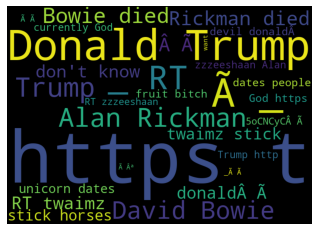

Time need : 0.5151801109313965


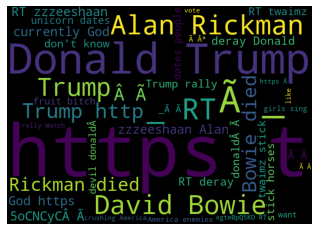

Time need : 0.5486040115356445


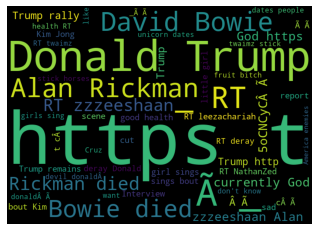

Time need : 0.5949079990386963


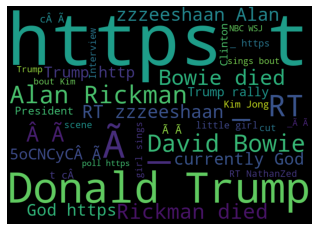

Time need : 0.6229033470153809


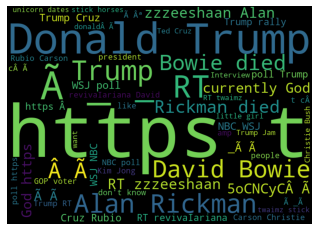

Time need : 0.6001100540161133


In [52]:
lis = [elena1, elena2, elena3, elena4, elena5]
wordcloud(lis)